# David Haase (NYC-MHTN-DS-042219)
#### Project 1: King County Housing Data Analysis 
#### Task:
* Clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible. 

#### Result:


## [code] Import Standard Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## [code] Define Utility Functions

In [2]:
def get_data(data_file):
    try:
        data = pd.read_csv(data_file)
    except Exception as e:
        print(e) 
    return data

def get_model(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    X_int = sm.add_constant(X)
    return sm.OLS(y,X_int).fit()

def show_predictions(feature):
    

    f = 'price~'+ feature
    feat_model = smf.ols(formula=f, data=df).fit()
    feat_model.summary()

    # create a DataFrame with the minimum and maximum values of TV
    X_new = pd.DataFrame({feature: [df_final[feature].min(), df_final[feature].max()]})
    print(X_new.head())

    # make predictions for those x values and store them
    preds = feat_model.predict(X_new)
    print (preds)

    # first, plot the observed data and the least squares line
    df_final.plot(kind='scatter', x=feature, y='price')
    plt.plot(X_new, preds, c='red', linewidth=2)
    plt.show()

    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(feat_model, feature, fig=fig)
    plt.show()
# 
    
def train_and_check_error(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    print(len(X_train), len(X_test), len(y_train), len(y_test))
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test

    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
    print('Train Mean Squared Error:', mse_train)
    print('Test Mean Squared Error:', mse_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('Train Mean Squared Error:', train_mse)
    print('Test Mean Squared Error:', test_mse)

## [code] Main program begins here
* Define your project variables
* Set up your sample and population data

In [3]:
data_file = 'kc_house_data.csv'
sample_percent = 0.8

raw = get_data(data_file)

In [4]:
raw.shape

(21597, 21)

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
raw.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Start the first round of testing
* Run a test on dirty data

In [8]:
# Get rid of the id column (domain knowledge)
df = raw.drop('id', axis=1)

As expected, the OLS crashes on dirty, raw data.

In [9]:
model = get_model(df, 'price')
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### Start cleaning up: NaNs, placeholders, continuous and categoric transformations
#### id, date and engineered date features

In [10]:
# Convert the date STR to date DATE
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')

# Engineer new features: Day of the week, Month, Age
df['Dayofweek'] = df.date.dt.dayofweek
df['Month'] = df.date.dt.month
df['Age'] = df.date.dt.year - df.yr_built

# So, get rid of the original columns
df.drop(['date', 'yr_built'], axis=1, inplace=True)

#### yr_renovated
* Strange to have floats
* 17.8% = NaNs (n=3842)
* 78.8% = 0.0 (n=17,011), presumably never remodeled

In [11]:
df['yr_renovated'].isna().sum()
df['yr_renovated'].value_counts()

# Convert to binary category: Renovated?  
# Deal with NaNs 

# For now, remove
df.drop('yr_renovated', axis=1, inplace=True)

#### sqft_basement
* Simply conversion to int() fails, why?
* 2.1% = '?', n=454
* 61.5% '0.0' or '0.00' n=13,280; presumably this means no basement
#### Decision
* Convert to category: _Has Basement?_ and split the '?' evenly
* Deleting feature for now

In [12]:
# Converting sqft_basement to int() fails, why?
df['sqft_basement'].value_counts()

#For now, drop it
df.drop('sqft_basement', axis=1, inplace=True)

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,Dayofweek,Month,Age
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,98178,47.5112,-122.257,1340,5650,0,10,59
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,98125,47.7210,-122.319,1690,7639,1,12,63
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,98028,47.7379,-122.233,2720,8062,2,2,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,98136,47.5208,-122.393,1360,5000,1,12,49
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,98074,47.6168,-122.045,1800,7503,2,2,28


#### view
* Value counts look clean
* < 0.3% = NaN, n=63 counts
#### Decision
* Let's just convert those to the median which is: 0.00

In [14]:
df['view'].value_counts()
df['view'] = df['view'].fillna(value=df['view'].median())
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

#### waterfront
* 11.0% = NaN, n=2,376
* Value Counts are binary, 1 (n=146) or 0 (n=19,075)
* 0.8% probability that it is waterfront
#### Decision
* Convert NaNs to higher probability: 0
* Convert to category with dummy variables

In [15]:
# Fill the NaNs with the higher probable value
df.waterfront.value_counts()
df['waterfront'] = df['waterfront'].fillna(value=0)

# Converting to categories
wtf_dummies = pd.get_dummies(df['waterfront'], prefix="wtf_")
df = pd.concat([df, wtf_dummies], axis=1)

# Now drop the column
df.drop('waterfront', axis=1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,Dayofweek,Month,Age,wtf__0.0,wtf__1.0
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,98178,47.5112,-122.257,1340,5650,0,10,59,1,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,98125,47.7210,-122.319,1690,7639,1,12,63,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,98028,47.7379,-122.233,2720,8062,2,2,82,1,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,98136,47.5208,-122.393,1360,5000,1,12,49,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,98074,47.6168,-122.045,1800,7503,2,2,28,1,0


#### And so on...
* Here I ran out of time, but further tests might help
* But I least OLS doesn't crash

In [16]:
# Fill the NaNs with the higher probable value
df.zipcode.value_counts()
df.condition.value_counts()
df.grade.value_counts()
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

## [code] Start Modeling
#### But OLS no longer crashes, so begin modeling

In [17]:
model = get_model(df, 'price')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2801.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:39:50   Log-Likelihood:            -2.9438e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.889e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.715e+06   1.92e+06      0.893      0.372   -2.05e+06    5.48e+06
bedrooms      -3.641e+04   1899.303    -19.168      0.000   -4.01e+04   -3.27e+04
bathrooms      4.395e+04   3238.434     13.570      0.000    3.76e+04    5.03e+04
sqft_living     149.9602      4.394     34.128      0.000     141.348     158.573
sqft_lot          0.1232      0.048      2.572      0.010       0.029       0.217
floors         8434.7541   3596.560      2.345      0.019    1385.231    1.55e+04
view            5.34e+04   2120.868     25.179      0.000    4.92e+04    5.76e+04
condition      2.499e+04   2317.454     10.785      0.000    2.05e+04    2.95e+04
grade          9.737e+04   2158.617     45.109      0.000    9.31e+04    1.02e+05
sqft_above       31.0407      4.358      7.123      0.000      22.500      39.582
zipcode        -590.5704     32.976    -17.909      0.000    -655.206    -525.935
lat            5.994e+05   1.07e+04     55.869      0.000    5.78e+05     6.2e+05
long          -2.157e+05   1.31e+04    -16.408      0.000   -2.41e+05    -1.9e+05
sqft_living15    20.6537      3.446      5.994      0.000      13.900      27.408
sqft_lot15       -0.3814      0.073     -5.202      0.000      -0.525      -0.238
Dayofweek      -148.4187    938.730     -0.158      0.874   -1988.398    1691.561
Month         -2738.0249    440.443     -6.217      0.000   -3601.325   -1874.725
Age            2768.2196     68.896     40.180      0.000    2633.179    2903.260
wtf__0.0       5.452e+05    9.6e+05      0.568      0.570   -1.34e+06    2.43e+06
wtf__1.0       1.169e+06    9.6e+05      1.219      0.223   -7.12e+05    3.05e+06
==============================================================================
Omnibus:                    18408.354   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1869064.744
Skew:                           3.579   Prob(JB):                         0.00
Kurtosis:                      48.009   Cond. No.                     3.63e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.66e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### How is it?
* P-value is way too high despite a nice R-Squared value
* Warnings indicate collinearity

## Next Step
### Which features are most highly correlated?

In [18]:
df.corr().sort_values(by=['price'], ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,Dayofweek,Month,Age,wtf__0.0,wtf__1.0
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.393497,0.036056,0.667951,0.605368,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.001747,-0.009928,-0.053890,-0.264306,0.264306
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,-0.059445,0.762779,0.876448,-0.199802,0.052155,0.241214,0.756402,0.184342,0.005260,0.012112,-0.318592,-0.104637,0.104637
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.249082,-0.146896,1.000000,0.756073,-0.185771,0.113575,0.200341,0.713867,0.120981,0.002406,0.008989,-0.448322,-0.082818,0.082818
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,-0.158904,0.756073,1.000000,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.006223,0.010153,-0.424386,-0.071778,0.071778
sqft_living15,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.278928,-0.093072,0.713867,0.731767,-0.279299,0.048679,0.335626,1.000000,0.183515,0.004308,0.002513,-0.326697,-0.083823,0.083823
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,-0.126479,0.665838,0.686668,-0.204786,0.024280,0.224903,0.569884,0.088303,0.010466,0.007543,-0.507561,-0.063629,0.063629
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.045622,0.249082,0.166017,0.085059,0.006321,-0.077702,0.278928,0.073083,0.006858,-0.005161,0.054467,-0.380543,0.380543
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.026496,0.356563,0.479386,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.009673,-0.001046,-0.155817,0.002127,-0.002127
lat,0.306692,-0.009951,0.024280,0.052155,-0.085514,0.049239,0.006321,-0.015102,0.113575,-0.001199,0.266742,1.000000,-0.135371,0.048679,-0.086139,-0.016476,0.014995,0.147898,0.012157,-0.012157
wtf__1.0,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,0.380543,0.016648,0.082818,0.071778,0.028923,-0.012157,-0.037628,0.083823,0.030658,-0.005641,0.008199,0.024406,-1.000000,1.000000


### Just to visualize and experiment with Sam Bell's masking code

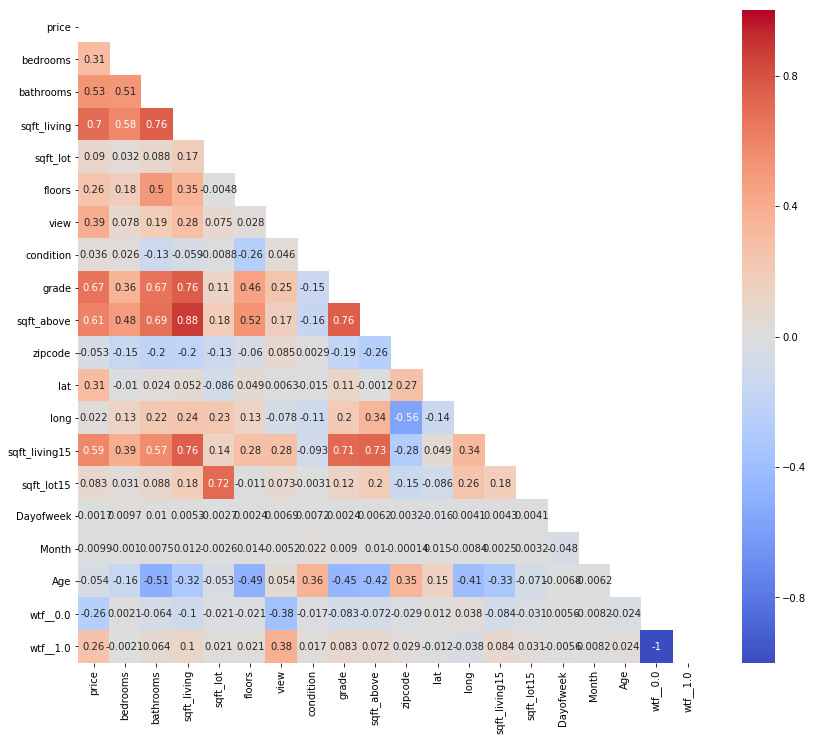

In [19]:
correlation = df.corr()
plt.figure(figsize=(14,12))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask,
                     linewidths=0, vmin=-1, cmap="coolwarm")

### Dropping everything but the top eight

In [20]:
df_final_colums = ['price','sqft_living', 'grade','sqft_above','sqft_living15','bathrooms','view','bedrooms','lat']
df_final = pd.DataFrame(df[df_final_colums])
model = get_model(df_final,'price')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4783.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:39:52   Log-Likelihood:            -2.9638e+05
No. Observations:               21597   AIC:                         5.928e+05
Df Residuals:                   21588   BIC:                         5.928e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.181e+07   5.24e+05    -60.678      0.000   -3.28e+07   -3.08e+07
sqft_living     208.7275      4.368     47.781      0.000     200.165     217.290
grade          7.874e+04   2260.281     34.837      0.000    7.43e+04    8.32e+04
sqft_above      -11.8291      4.106     -2.881      0.004     -19.878      -3.780
sqft_living15     4.2253      3.614      1.169      0.242      -2.859      11.310
bathrooms     -1.317e+04   3118.563     -4.222      0.000   -1.93e+04   -7055.295
view           9.382e+04   2122.629     44.200      0.000    8.97e+04     9.8e+04
bedrooms      -2.834e+04   2060.725    -13.752      0.000   -3.24e+04   -2.43e+04
lat            6.608e+05   1.11e+04     59.771      0.000    6.39e+05    6.83e+05
==============================================================================
Omnibus:                    18870.324   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1749172.499
Skew:                           3.768   Prob(JB):                         0.00
Kurtosis:                      46.440   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### How is it now?
#### Two features still have evelated P-values, removing:
* sqft_above
* sqft_living15

In [21]:
df_final_colums = ['price','sqft_living', 'grade','bathrooms','view','bedrooms','lat']
df_final = pd.DataFrame(df[df_final_colums])
model = get_model(df_final,'price')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     6374.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:39:53   Log-Likelihood:            -2.9638e+05
No. Observations:               21597   AIC:                         5.928e+05
Df Residuals:                   21590   BIC:                         5.928e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.201e+07   5.19e+05    -61.631      0.000    -3.3e+07    -3.1e+07
sqft_living   202.4241      3.245     62.372      0.000     196.063     208.785
grade        7.773e+04   2082.099     37.333      0.000    7.37e+04    8.18e+04
bathrooms   -1.353e+04   3110.258     -4.350      0.000   -1.96e+04   -7431.881
view          9.53e+04   2062.438     46.209      0.000    9.13e+04    9.93e+04
bedrooms    -2.804e+04   2058.083    -13.627      0.000   -3.21e+04    -2.4e+04
lat          6.651e+05   1.09e+04     60.773      0.000    6.44e+05    6.87e+05
==============================================================================
Omnibus:                    18821.050   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1724596.679
Skew:                           3.755   Prob(JB):                         0.00
Kurtosis:                      46.129   Cond. No.                     7.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### How is it?
* No more high P values

### Now let's check for linearity

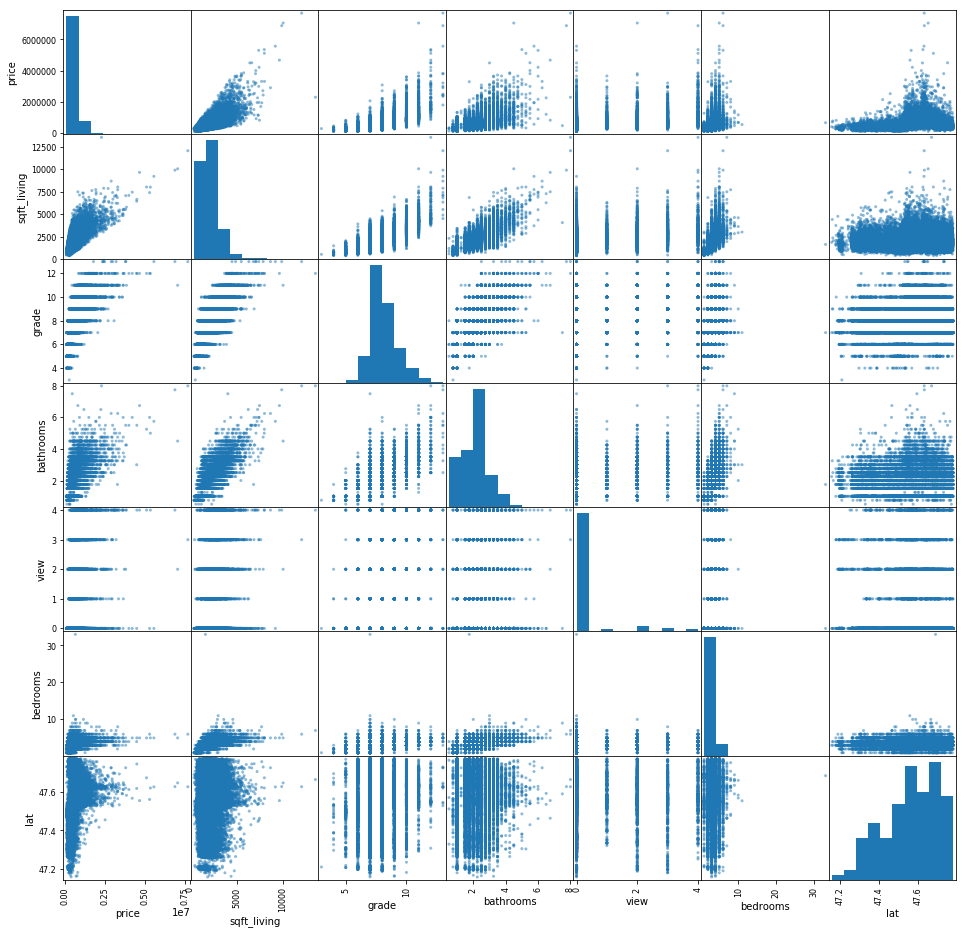

In [22]:
pd.plotting.scatter_matrix(df_final,figsize  = [16, 16]);

### Linearity of view seems problematic, removing view

In [23]:
df_final_colums = ['price','sqft_living', 'grade','bathrooms','bedrooms','lat']
df_final = pd.DataFrame(df[df_final_colums])
model = get_model(df_final,'price')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     6572.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:40:12   Log-Likelihood:            -2.9740e+05
No. Observations:               21597   AIC:                         5.948e+05
Df Residuals:                   21591   BIC:                         5.949e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.155e+07   5.44e+05    -57.965      0.000   -3.26e+07   -3.05e+07
sqft_living   228.9736      3.348     68.384      0.000     222.411     235.537
grade         8.24e+04   2180.008     37.799      0.000    7.81e+04    8.67e+04
bathrooms   -1.911e+04   3257.903     -5.865      0.000   -2.55e+04   -1.27e+04
bedrooms    -3.684e+04   2148.165    -17.148      0.000    -4.1e+04   -3.26e+04
lat          6.549e+05   1.15e+04     57.100      0.000    6.32e+05    6.77e+05
==============================================================================
Omnibus:                    18749.918   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1455990.513
Skew:                           3.793   Prob(JB):                         0.00
Kurtosis:                      42.502   Cond. No.                     7.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Rechecking linearity

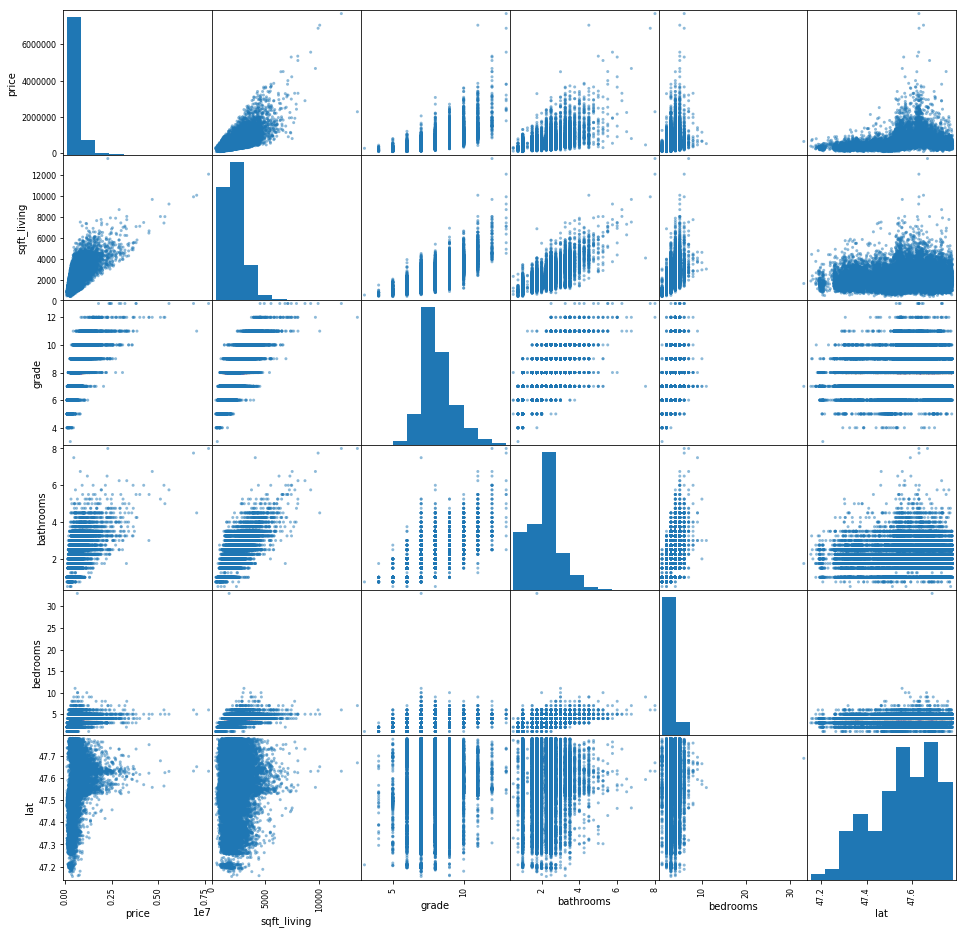

In [24]:
pd.plotting.scatter_matrix(df_final,figsize  = [16, 16]);

### Before:  Now let's try to improve the distribution of our top six correlated features

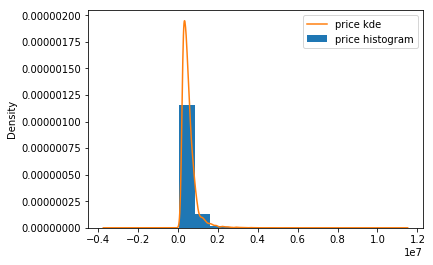

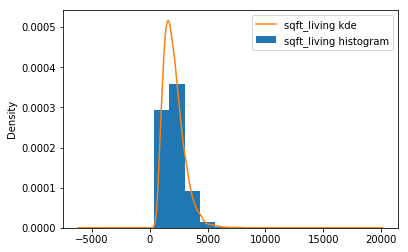

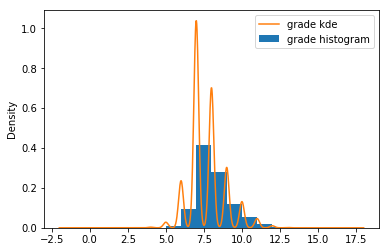

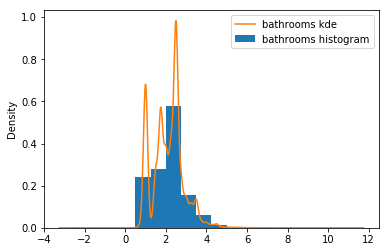

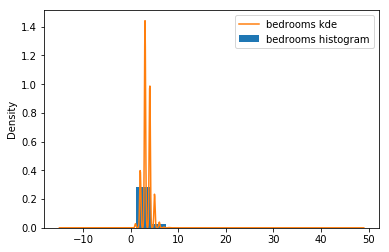

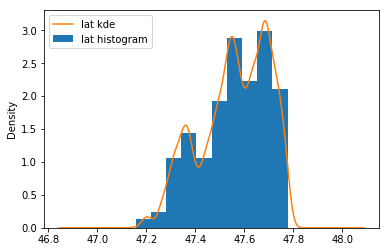

In [25]:
for column in df_final:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label=column+' kde')
    plt.legend()
    plt.show()

### After Logarithm Transformation
* Trying logorithm on price, sqft_living and bedrooms
* Seems wildly improved

In [26]:
logprice = np.log(df_final['price'])
scaled_price = (logprice-np.mean(logprice))/np.sqrt(np.var(logprice))

logsqft_living = np.log(df_final['sqft_living'])
scaled_living = (logsqft_living-np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))

logbedrooms = np.log(df_final['bedrooms'])
scaled_bedrooms = (logbedrooms-np.mean(logbedrooms))/np.sqrt(np.var(logbedrooms))

df_final.price = scaled_price
df_final.bedrooms = scaled_bedrooms
df_final.sqft_living = scaled_living


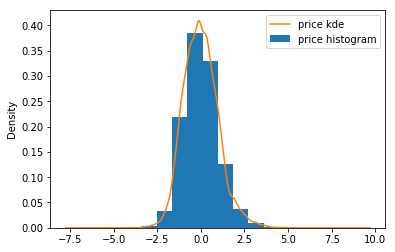

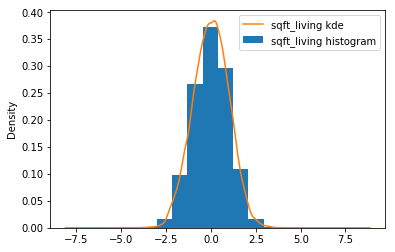

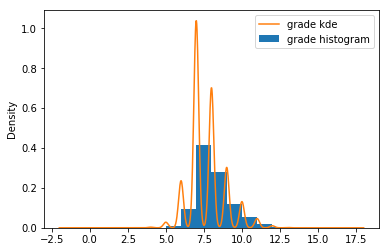

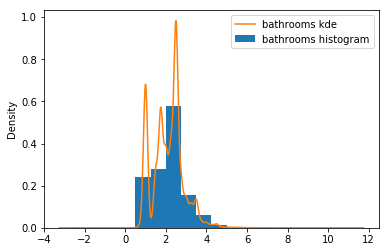

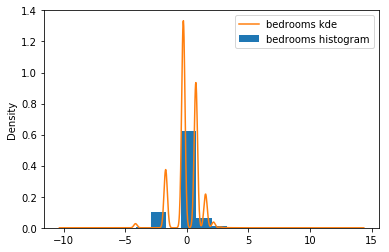

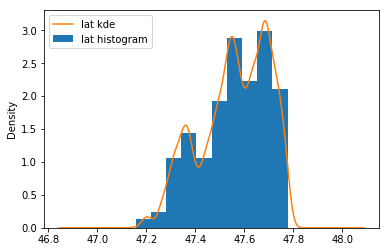

In [27]:
for column in df_final:
    df_final[column].plot.hist(density=True, label = column+' histogram')
    df_final[column].plot.kde(label=column+' kde')
    plt.legend()
    plt.show()

### How is it?
* Looks good for price and sqft_living
* small improvements on the others

In [28]:
model = get_model(df_final,'price')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                 1.005e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:40:54   Log-Likelihood:                -17661.
No. Observations:               21597   AIC:                         3.533e+04
Df Residuals:                   21591   BIC:                         3.538e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -136.0337      1.290   -105.413      0.000    -138.563    -133.504
sqft_living     0.4252      0.008     56.170      0.000       0.410       0.440
grade           0.3072      0.005     60.960      0.000       0.297       0.317
bathrooms       0.0160      0.008      2.060      0.039       0.001       0.031
bedrooms       -0.0659      0.005    -13.082      0.000      -0.076      -0.056
lat             2.8101      0.027    103.281      0.000       2.757       2.863
==============================================================================
Omnibus:                      888.203   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1191.505
Skew:                           0.424   Prob(JB):                    1.85e-259
Kurtosis:                       3.778   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Note that the P-value of bathrooms is now elevated

In [29]:
df_final.drop('bathrooms', axis=1, inplace=True)

In [30]:
model = get_model(df_final,'price')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                 1.256e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:41:01   Log-Likelihood:                -17664.
No. Observations:               21597   AIC:                         3.534e+04
Df Residuals:                   21592   BIC:                         3.538e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -135.9294      1.290   -105.406      0.000    -138.457    -133.402
sqft_living     0.4315      0.007     62.449      0.000       0.418       0.445
grade           0.3098      0.005     63.477      0.000       0.300       0.319
bedrooms       -0.0647      0.005    -12.932      0.000      -0.075      -0.055
lat             2.8082      0.027    103.263      0.000       2.755       2.861
==============================================================================
Omnibus:                      882.954   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1188.176
Skew:                           0.421   Prob(JB):                    9.79e-259
Kurtosis:                       3.782   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df_final.corr().sort_values(by=['price'], ascending=False)

,price,sqft_living,grade,bedrooms,lat
price,1.000000,0.674802,0.703720,0.342850,0.448837
grade,0.703720,0.743038,1.000000,0.380427,0.113575
sqft_living,0.674802,1.000000,0.743038,0.648121,0.038820
lat,0.448837,0.038820,0.113575,-0.026784,1.000000
bedrooms,0.342850,0.648121,0.380427,1.000000,-0.026784


In [32]:
# df_final.drop('bedrooms', axis=1, inplace=True)

In [33]:
model = get_model(df_final,'price')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                 1.256e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        13:41:04   Log-Likelihood:                -17664.
No. Observations:               21597   AIC:                         3.534e+04
Df Residuals:                   21592   BIC:                         3.538e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -135.9294      1.290   -105.406      0.000    -138.457    -133.402
sqft_living     0.4315      0.007     62.449      0.000       0.418       0.445
grade           0.3098      0.005     63.477      0.000       0.300       0.319
bedrooms       -0.0647      0.005    -12.932      0.000      -0.075      -0.055
lat             2.8082      0.027    103.263      0.000       2.755       2.861
==============================================================================
Omnibus:                      882.954   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1188.176
Skew:                           0.421   Prob(JB):                    9.79e-259
Kurtosis:                       3.782   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check the normality assumptions by creating a QQ-plots

/Users/davidhaase/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


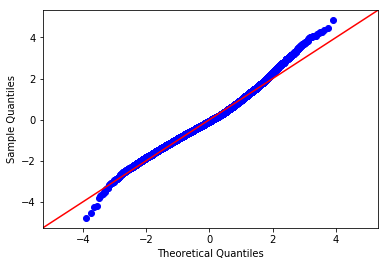

In [34]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Predictive Visualizations

      price
0 -3.387659
1  5.333889
0   -3.387659
1    5.333889
dtype: float64


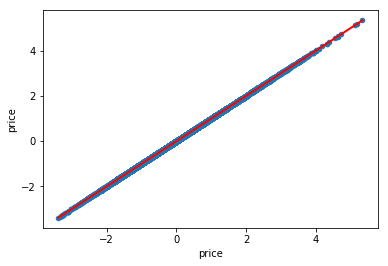

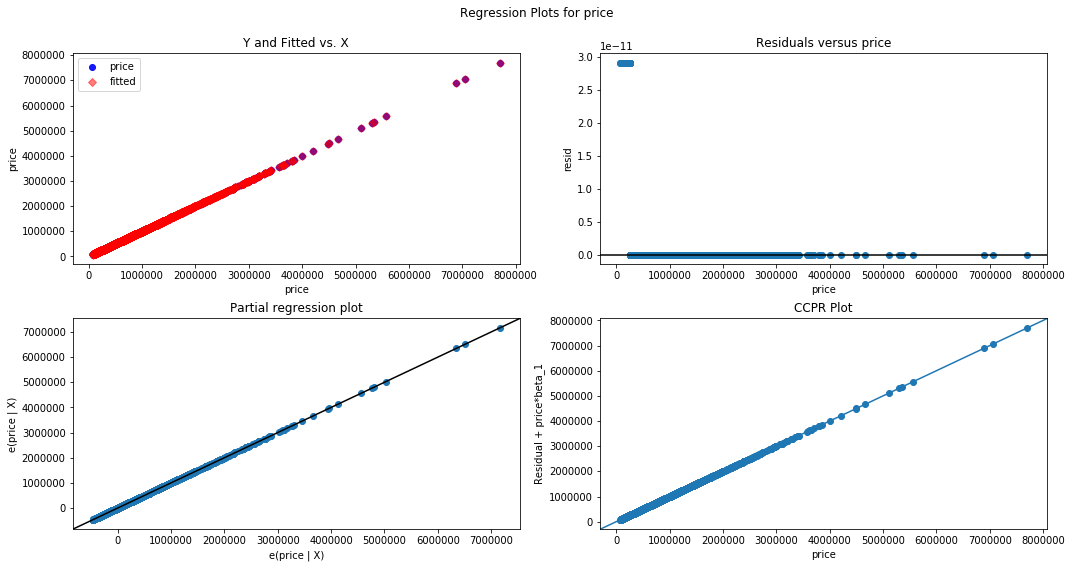

   sqft_living
0    -3.859712
1     4.626992
0   -45072.942675
1   -42689.341178
dtype: float64


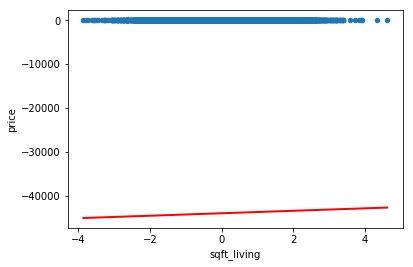

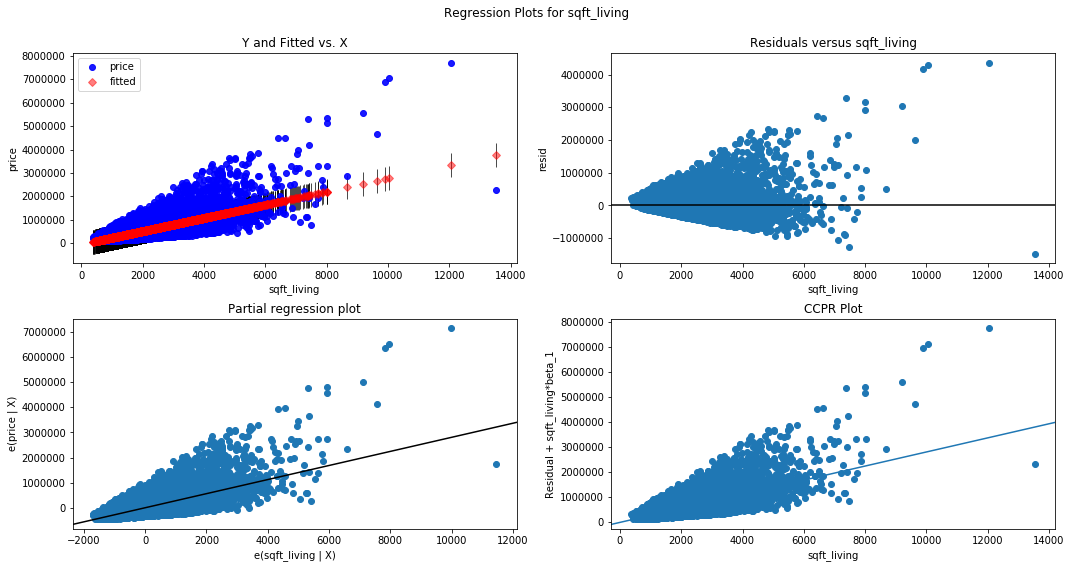

   grade
0      3
1     13
0   -4.339427e+05
1    1.657635e+06
dtype: float64


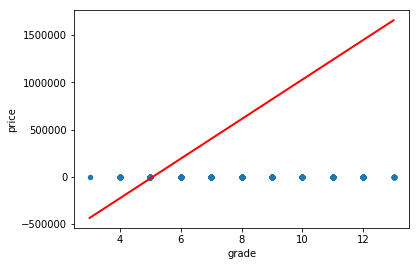

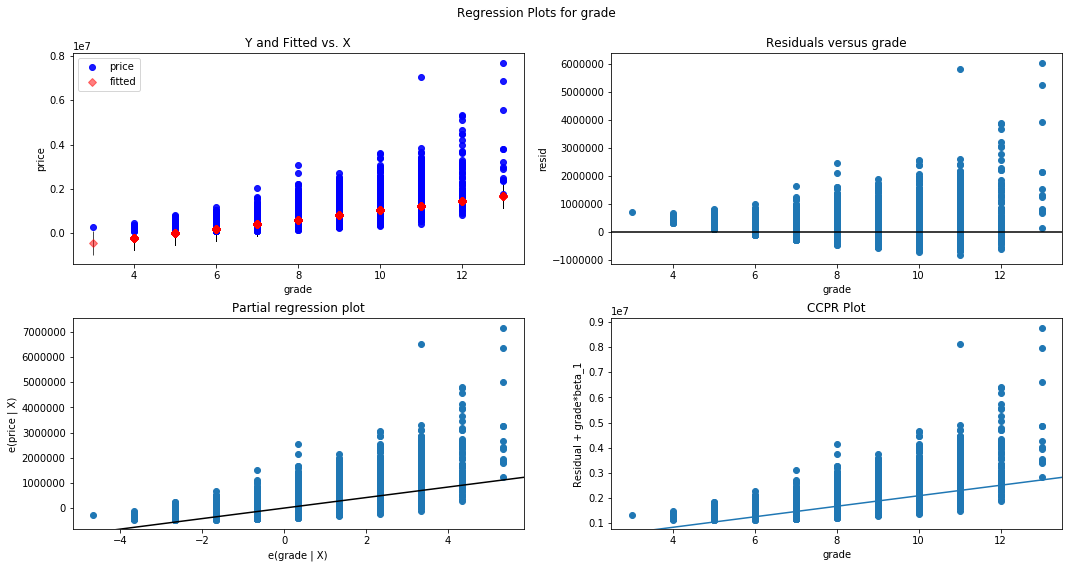

   bedrooms
0 -4.159544
1  8.188596
0   -3.821968e+05
1    1.130011e+06
dtype: float64


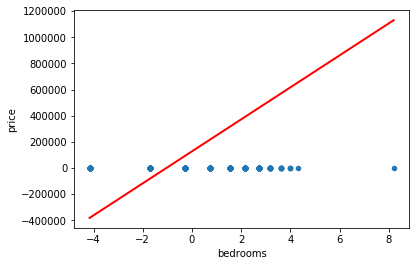

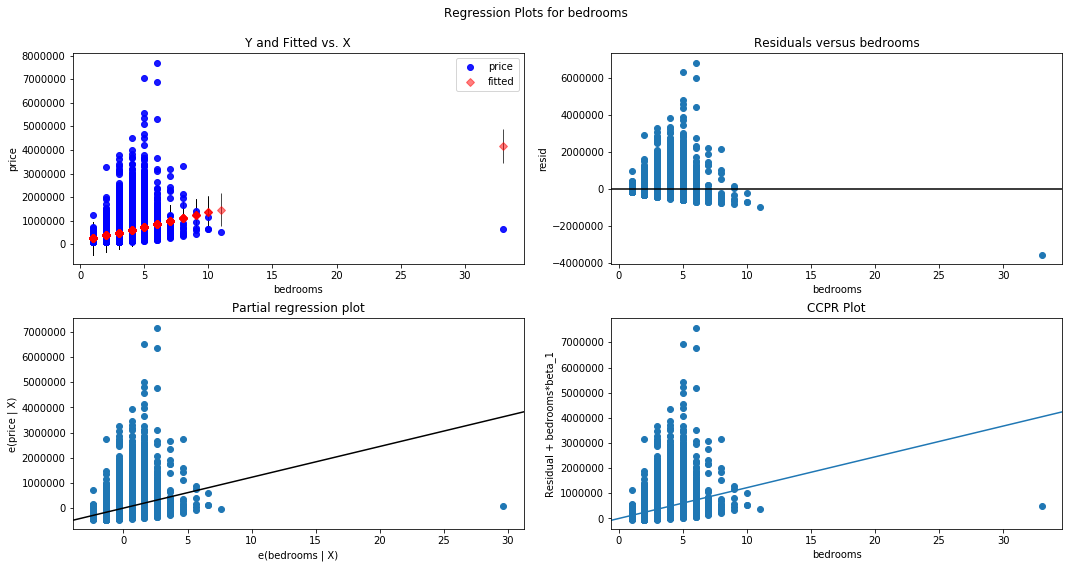

       lat
0  47.1559
1  47.7776
0    211610.660283
1    717171.209533
dtype: float64


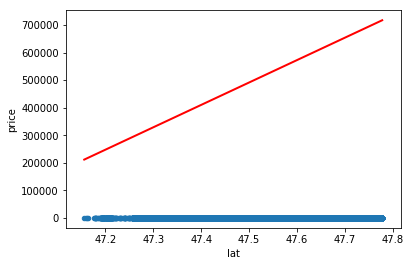

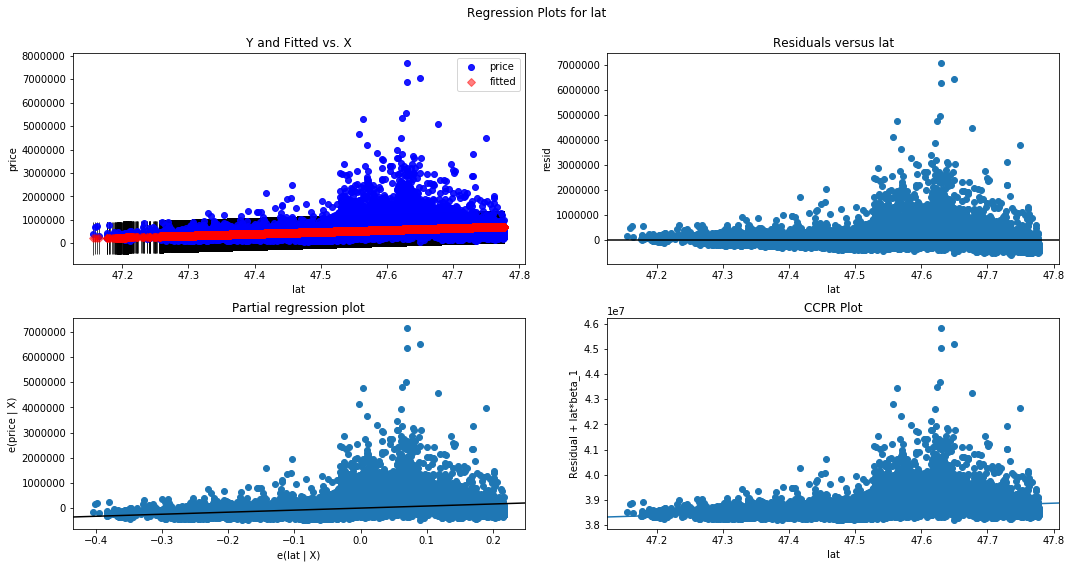

In [35]:
for feature in df_final.columns:
    show_predictions(feature)

## Training
### Now split the data into 80/20 and check the error rates

In [36]:
target = 'price'
y = df_final[[target]]
X = df_final.drop([target], axis=1)

In [37]:
train_and_check_error(X,y,0.2)

17277 4320 17277 4320
Train Mean Squared Error: price    0.299888
dtype: float64
Test Mean Squared Error: price    0.303227
dtype: float64
Train Mean Squared Error: 0.29988840613119466
Test Mean Squared Error: 0.30322696597389465
